In [1]:
#import libraries
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
#re-size all the images to this
IMAGE_SIZE=[224,224]
#Train data(images) path
train_path='C:/Users/user/AIML/DL handson/cnn_data/train'
#Test data(images) path
valid_path='C:/Users/user/AIML/DL handson/cnn_data/test'

# Add preprocessing layer to the front of Resnet50

In [3]:
resnet50=ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

#dont train existing weights
for layer in resnet50.layers:
    layer.trainable=False


94765736/94765736 [==============================] - 52s 1us/step


In [4]:
#Getting number of classes
folders=glob('C:/Users/user/AIML/DL handson/cnn_data/train/*')

In [5]:
folders

['C:/Users/user/AIML/DL handson/cnn_data/train\\cat',
 'C:/Users/user/AIML/DL handson/cnn_data/train\\dog']

In [6]:
len(folders)

2

In [7]:
#Our layers - you can add more layer if you want
x=Flatten()(resnet50.output)
#Defined the output layer
prediction=Dense(len(folders),activation='softmax')(x)

# create a model object

In [8]:
model=Model(inputs=resnet50.input,outputs=prediction)
print(model.summary())


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [9]:
#Tell the model -What cost & optimization method to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [10]:
#to perform image augmentation
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255)

#Training set
print('Training length:\n')
training_set=train_datagen.flow_from_directory('C:/Users/user/AIML/DL handson/cnn_data/train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')
print('='*100)

#Testing set
print('Test length:\n')
test_set=test_datagen.flow_from_directory('C:/Users/user/AIML/DL handson/cnn_data/test',
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical')

Training length:

Found 1200 images belonging to 2 classes.
Test length:

Found 408 images belonging to 2 classes.


# Train the model

In [11]:
r=model.fit(training_set,
            validation_data=test_set,
            epochs=30,
            steps_per_epoch=len(training_set),
            validation_steps=len(test_set))

Epoch 1/30
38/38 [==============================] - 198s 5s/step - loss: 2.4869 - accuracy: 0.5200 - val_loss: 0.8593 - val_accuracy: 0.5343
Epoch 2/30
38/38 [==============================] - 222s 6s/step - loss: 0.7216 - accuracy: 0.6050 - val_loss: 0.7250 - val_accuracy: 0.5735
Epoch 3/30
38/38 [==============================] - 215s 6s/step - loss: 0.7771 - accuracy: 0.5758 - val_loss: 0.9813 - val_accuracy: 0.5539
Epoch 4/30
38/38 [==============================] - 214s 6s/step - loss: 0.9283 - accuracy: 0.5542 - val_loss: 0.9803 - val_accuracy: 0.5466
Epoch 5/30
38/38 [==============================] - 214s 6s/step - loss: 0.6562 - accuracy: 0.6483 - val_loss: 0.6430 - val_accuracy: 0.6716
Epoch 6/30
38/38 [==============================] - 215s 6s/step - loss: 0.7288 - accuracy: 0.6183 - val_loss: 0.8324 - val_accuracy: 0.5956
Epoch 7/30
38/38 [==============================] - 214s 6s/step - loss: 0.6965 - accuracy: 0.6475 - val_loss: 0.5991 - val_accuracy: 0.6863
Epoch 8/30
38

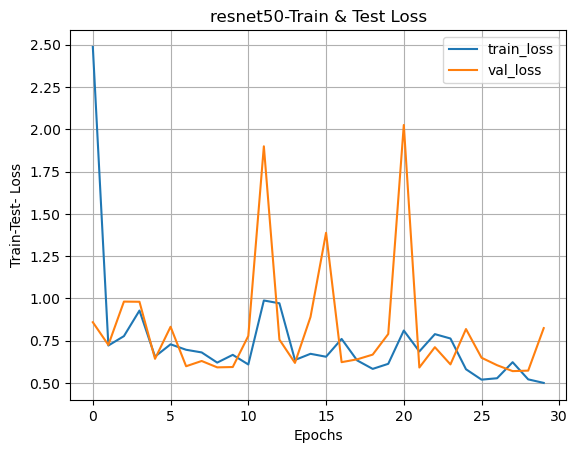

<Figure size 640x480 with 0 Axes>

In [12]:
#loss
plt.title('resnet50-Train & Test Loss')
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('resnet50--Loss & Val_loss')

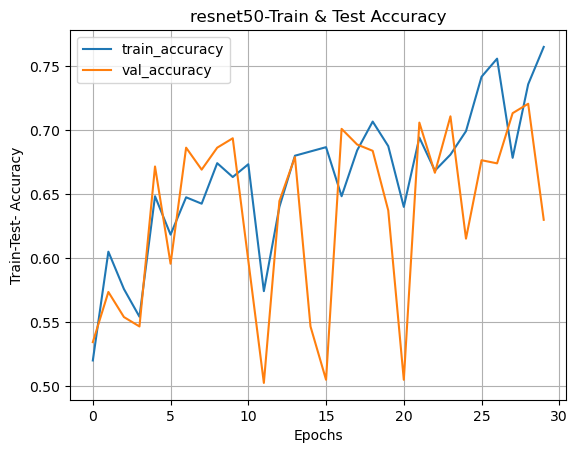

<Figure size 640x480 with 0 Axes>

In [13]:
#Accuracy
plt.title('resnet50-Train & Test Accuracy')
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Accuracy')
plt.grid()
plt.legend()
plt.show()
plt.savefig('resnet50--Accuracy & Val_accuracy')


In [14]:
import tensorflow as tf
from keras.models import load_model
model.save('Restnet50_dog_cat_classify.h5')

C:\ProgramData\anaconda3-1\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
model.save('Restnet50_dog_cat_classify.keras')

In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [17]:
#Confusion Matrix & Classification report
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
ypred=model.predict(test_set,100//5)
ypred=np.argmax(ypred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes,ypred))
print('='*100)
print('Classification Report')
print(classification_report(test_set.classes,ypred,target_names=['cat','dog']))
print('='*100)
print('Accuracy Score')
print(accuracy_score(test_set.classes,ypred))


13/13 [==============================] - 47s 3s/step
Confusion Matrix
[[164  40]
 [175  29]]
Classification Report
              precision    recall  f1-score   support

         cat       0.48      0.80      0.60       204
         dog       0.42      0.14      0.21       204

    accuracy                           0.47       408
   macro avg       0.45      0.47      0.41       408
weighted avg       0.45      0.47      0.41       408

Accuracy Score
0.4730392156862745


<Axes: >

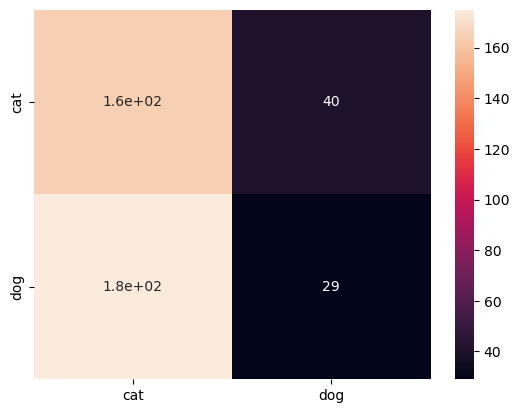

In [18]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_set.classes,ypred),annot=True,xticklabels=['cat','dog'],
            yticklabels=['cat','dog'])